In [1]:
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.io
from scipy.special import expit #Vectorized sigmoid function

**NOTE:** I decided to use the scikit-le

# Regularized Linear Regression and Bias vs. Variance

In [2]:
data=scipy.io.loadmat('data/ex5data1.mat')

In [3]:
X = data['X']
Xval = data['Xval']
Xtest = data['Xtest']

y = data['y']
yval = data['yval']
ytest = data['ytest']

### Visualize the dataset

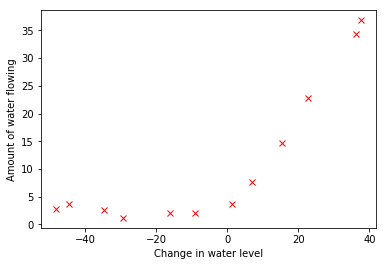

In [4]:
plt.plot(X,y, 'xr')
plt.xlabel('Change in water level')
plt.ylabel('Amount of water flowing')
plt.show()

### Linear regression

In [5]:
from sklearn import linear_model
regr = linear_model.LinearRegression(fit_intercept=True)
regr.fit( X , y )
print regr.coef_, regr.intercept_
y_pred = regr.predict(X)

[[ 0.36777923]] [ 13.08790351]


/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


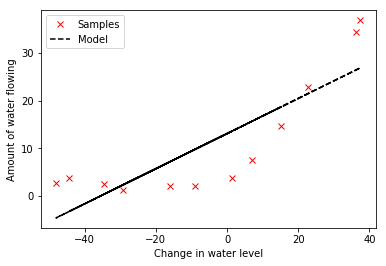

In [6]:
plt.plot(X,y, 'xr',label="Samples")
plt.plot(X,y_pred, "k--", label="Model")
plt.xlabel('Change in water level')
plt.ylabel('Amount of water flowing')
plt.legend()
plt.show()

### Visualize cost function on the training and the x-validation dataset

In [59]:
def cost(model, X, y):
    return float( 1./(2.*len(X)) * np.dot((model.predict(X) - y).T, model.predict(X) - y))

def plot_training_curve(model, X, y, Xval, yval):

    n_train= range(1,len(X))

    n_score_train=[]
    n_score_val=[]
    
    for i in n_train:
        model.fit(X[:i],y[:i])
        n_score_train.append(cost(model,X[:i],y[:i]))
        n_score_val.append(cost(model,Xval,yval))
                                     
    plt.plot(n_train,n_score_train, "g", label="Training set")    
    plt.plot(n_train,n_score_val, "b", label="Validation set")    
    plt.title("Trianing curve")
    plt.xlabel("Number of training example")
    plt.ylabel("Error")
    plt.legend()
    plt.ylim(-1,150)
    plt.grid(True)
    return plt

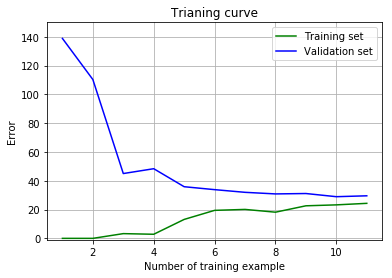

In [60]:
plt = plot_training_curve(regr,X,y,Xval,yval)
plt.show()

### Polynomial regression

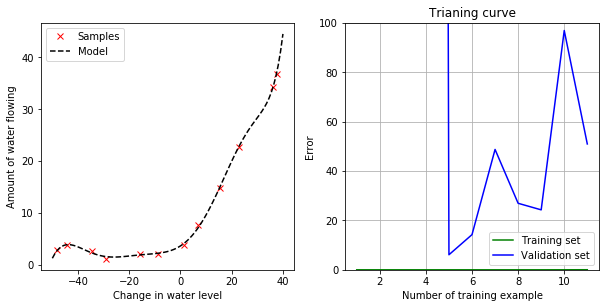

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

scale = StandardScaler()
polynomial_features = PolynomialFeatures(degree=8)
linear_regression = Ridge(alpha=0., fit_intercept=True)
pipeline = Pipeline([("scale",scale),
                     ("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])

pipeline.fit(X, y)

X_pred = np.linspace(-50, 40, 100)
y_pred = pipeline.predict(X_pred[:, np.newaxis])

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(X,y, 'xr',label="Samples")
plt.plot(X_pred,y_pred, "k--", label="Model")
plt.xlabel('Change in water level')
plt.ylabel('Amount of water flowing')
plt.legend()
plt.subplot(222)
plt=plot_training_curve(pipeline,X,y,Xval,yval)
plt.ylim(0,100)
plt.show()

### Adjusting the regularization parameter on the x-validation dataset

Best regularization parameter: 3.42


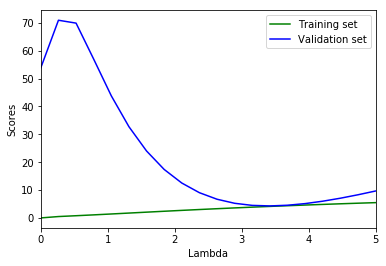

In [41]:
lambdas = np.linspace(0,5,20)
scores_train = []
scores_val = []

for l in lambdas:
    scale = StandardScaler()
    polynomial_features = PolynomialFeatures(degree=8)
    linear_regression = Ridge(alpha=l, fit_intercept=True)
    pipeline = Pipeline([("scale",scale),
                         ("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    
    pipeline.fit(X, y)

    scores_train.append( cost(pipeline,X,y))
    scores_val.append( cost(pipeline,Xval,yval))
    
plt.plot(lambdas,scores_train,"g", label="Training set")
plt.plot(lambdas,scores_val,"b", label="Validation set")
plt.legend()
plt.xlim(0,5)
plt.xlabel("Lambda")
plt.ylabel("Scores")

print "Best regularization parameter: %.2f" % lambdas[np.argmin(scores_val)]

### Computing test set error

In [62]:
scale = StandardScaler()
polynomial_features = PolynomialFeatures(degree=8)
linear_regression = Ridge(alpha=3.42, fit_intercept=True)
pipeline = Pipeline([("scale",scale),
                     ("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])

pipeline.fit(X, y)

print "Final SCORE on test sample: %.2f" % pipeline.score(Xtest,ytest)
print "Final COST on test sample: %.2f" % cost(pipeline,Xtest,ytest)

Final SCORE on test sample: 0.96
Final COST on test sample: 4.21
